### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
from sklearn import linear_model
%matplotlib inline

In [2]:
womenc=pd.read_csv("Womens Clothing E-Commerce Reviews.csv")

In [3]:
womenc.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


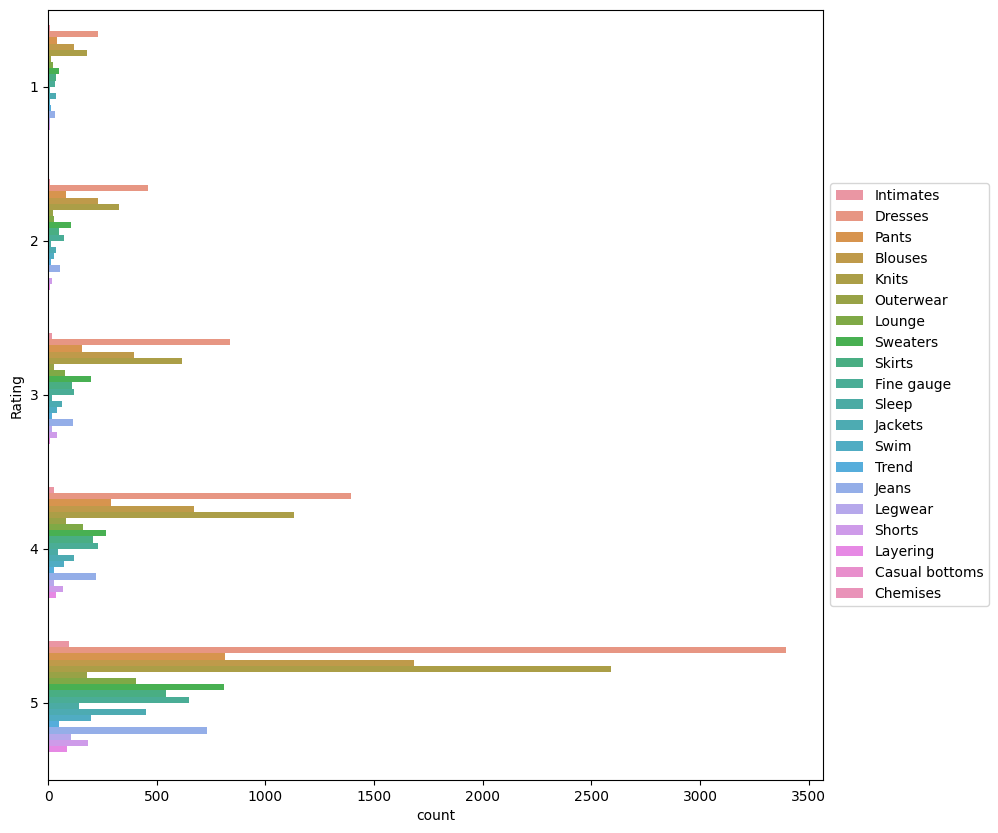

In [4]:
plt.figure(figsize=(10,10))
sns.countplot(y='Rating',hue='Class Name',data=womenc).legend(loc='center left', bbox_to_anchor=(1,0.5))

In [5]:
corRel=womenc[["Clothing ID","Age","Positive Feedback Count","Rating","Recommended IND"]].corr()
corRel

,Clothing ID,Age,Positive Feedback Count,Rating,Recommended IND
Clothing ID,1.000000,0.017972,0.046356,-0.018879,-0.016206
Age,0.017972,1.000000,0.043079,0.026831,0.030622
Positive Feedback Count,0.046356,0.043079,1.000000,-0.064961,-0.069045
Rating,-0.018879,0.026831,-0.064961,1.000000,0.792336
Recommended IND,-0.016206,0.030622,-0.069045,0.792336,1.000000


<AxesSubplot:>

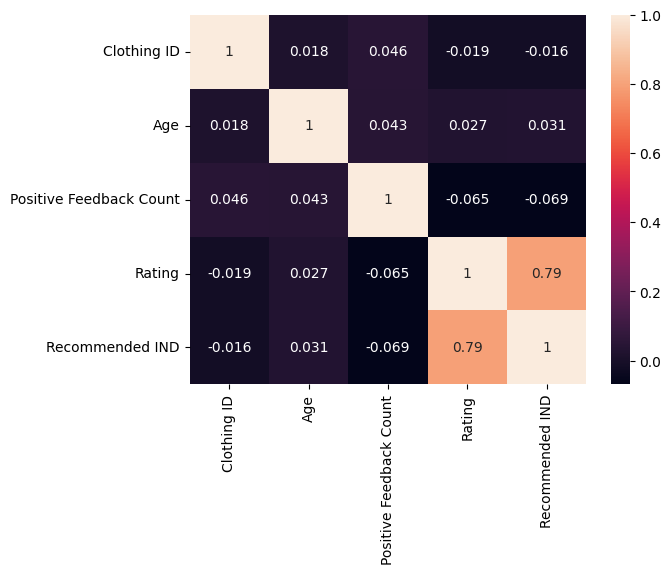

In [6]:
sns.heatmap(corRel,annot=True)

<AxesSubplot:>

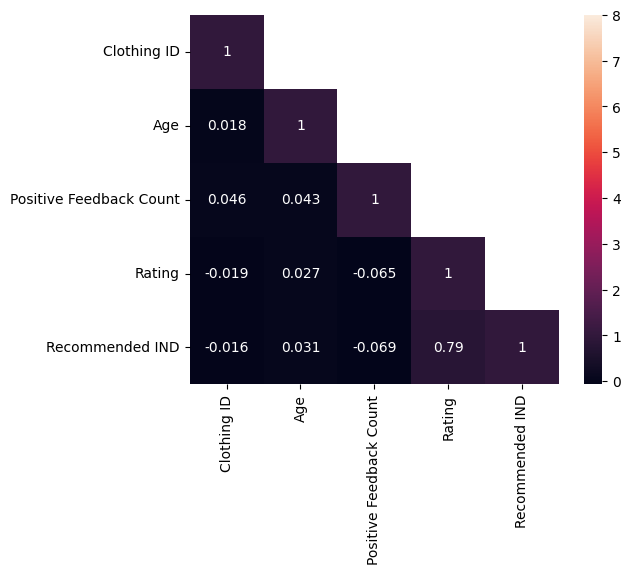

In [7]:
mask=np.array(corRel)
mask[np.tril_indices_from(mask)]=False
sns.heatmap(corRel,mask=mask,vmax=8,square=True,annot=True)  

In [8]:
womenc.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [9]:
womenc.rename(columns={'Clothing ID':'Cloth_ID','Positive Feedback Count':'pos_feed_count',
                       'Review Text':'Reviews','Recommended IND':'Recommended',
                       'Department Name':'Dept_Name','Division Name':'Div_Name'},
             inplace=True)
print(womenc.columns)

Index(['Unnamed: 0', 'Cloth_ID', 'Age', 'Title', 'Reviews', 'Rating',
       'Recommended', 'pos_feed_count', 'Div_Name', 'Dept_Name', 'Class Name'],
      dtype='object')


In [10]:
WoW=womenc.drop(womenc.columns[0],axis=1)  #dropping extra index

In [11]:
WoW.head()

,Cloth_ID,Age,Title,Reviews,Rating,Recommended,pos_feed_count,Div_Name,Dept_Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [12]:
WoW.corr()

,Cloth_ID,Age,Rating,Recommended,pos_feed_count
Cloth_ID,1.000000,0.017972,-0.018879,-0.016206,0.046356
Age,0.017972,1.000000,0.026831,0.030622,0.043079
Rating,-0.018879,0.026831,1.000000,0.792336,-0.064961
Recommended,-0.016206,0.030622,0.792336,1.000000,-0.069045
pos_feed_count,0.046356,0.043079,-0.064961,-0.069045,1.000000


## Feature engineering to convert strings into numerical data

In [13]:
WoW.head()

,Cloth_ID,Age,Title,Reviews,Rating,Recommended,pos_feed_count,Div_Name,Dept_Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [14]:
WoW.isnull().head()

,Cloth_ID,Age,Title,Reviews,Rating,Recommended,pos_feed_count,Div_Name,Dept_Name,Class Name
0,False,False,True,False,False,False,False,False,False,False
1,False,False,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False


### Data Cleaning(replacing null values with default values)

In [15]:
WoW["Title"].fillna("Basic", inplace=True)
WoW["Reviews"].fillna("Satisfactory", inplace=True)
WoW["Div_Name"].fillna("General", inplace=True)
WoW["Dept_Name"].fillna("Clothing", inplace=True)

In [16]:
WoW.isnull().sum()

Cloth_ID           0
Age                0
Title              0
Reviews            0
Rating             0
Recommended        0
pos_feed_count     0
Div_Name           0
Dept_Name          0
Class Name        14
dtype: int64

In [17]:
WoW=WoW.drop(WoW.columns[9],axis=1)
WoW.head()


,Cloth_ID,Age,Title,Reviews,Rating,Recommended,pos_feed_count,Div_Name,Dept_Name
0,767,33,Basic,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate
1,1080,34,Basic,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops


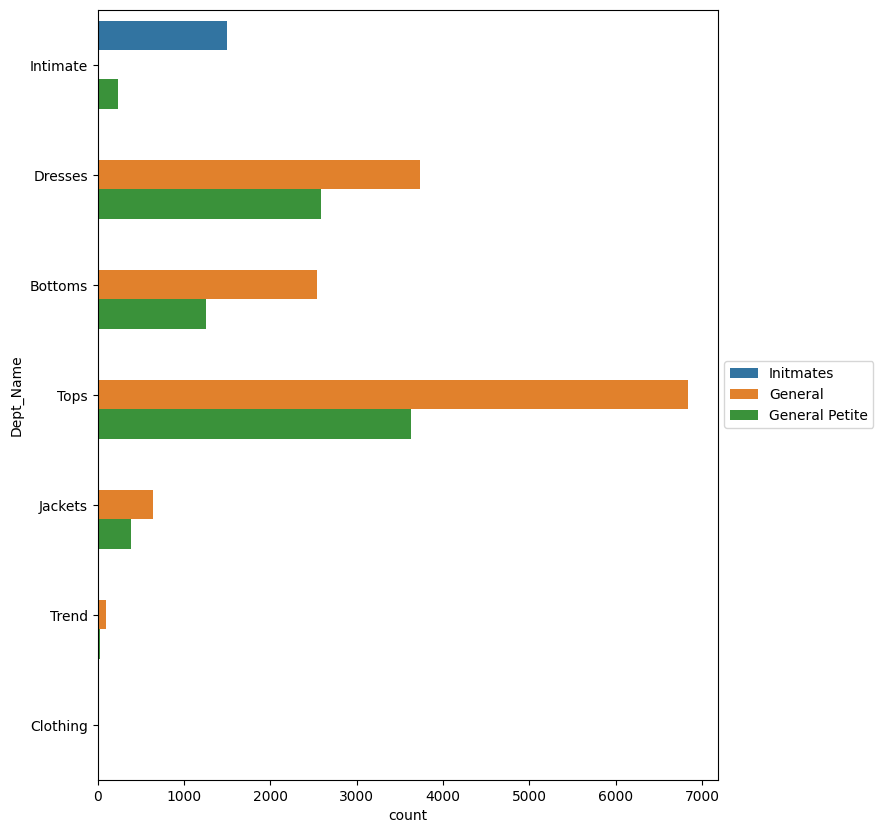

In [18]:
plt.figure(figsize=(8,10))
sns.countplot(y='Dept_Name',data=WoW, hue='Div_Name').legend(loc='center left', bbox_to_anchor=(1,0.5))

In [19]:
WoW.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Cloth_ID        23486 non-null  int64 
 1   Age             23486 non-null  int64 
 2   Title           23486 non-null  object
 3   Reviews         23486 non-null  object
 4   Rating          23486 non-null  int64 
 5   Recommended     23486 non-null  int64 
 6   pos_feed_count  23486 non-null  int64 
 7   Div_Name        23486 non-null  object
 8   Dept_Name       23486 non-null  object
dtypes: int64(5), object(4)
memory usage: 1.6+ MB


In [20]:
WoW['Dept_Name'].value_counts()

Tops        10468
Dresses      6319
Bottoms      3799
Intimate     1735
Jackets      1032
Trend         119
Clothing       14
Name: Dept_Name, dtype: int64

### Feature Engineering

In [21]:
dep_name=pd.unique(WoW['Dept_Name'])
dep_name

array(['Intimate', 'Dresses', 'Bottoms', 'Tops', 'Jackets', 'Trend',
       'Clothing'], dtype=object)

In [22]:
from sklearn.preprocessing import LabelEncoder
leo=LabelEncoder()

TypeError: '<' not supported between instances of 'str' and 'float'
this error occurs when we have missing values in our data

In [23]:
dept_labels=leo.fit_transform(WoW['Dept_Name'])
dept_labels

array([3, 2, 2, ..., 2, 2, 2])

In [24]:
#mapping of values in dictionaries using dictionary comprehension
dept_map={index:label for index, label in enumerate(leo.classes_)}
dept_map

{0: 'Bottoms',
 1: 'Clothing',
 2: 'Dresses',
 3: 'Intimate',
 4: 'Jackets',
 5: 'Tops',
 6: 'Trend'}

In [25]:
WoW['DeptLabel']=dept_labels   # adding the column dept_map in the dataframe
WoW[['Cloth_ID','Recommended','Dept_Name','DeptLabel']].head()

,Cloth_ID,Recommended,Dept_Name,DeptLabel
0,767,1,Intimate,3
1,1080,1,Dresses,2
2,1077,0,Dresses,2
3,1049,1,Bottoms,0
4,847,1,Tops,5


In [26]:
WoW.sample(frac=0.05,random_state=4)

,Cloth_ID,Age,Title,Reviews,Rating,Recommended,pos_feed_count,Div_Name,Dept_Name,DeptLabel
13737,1078,50,Love this dress!!,This dress is wonderful. fits perfect. very co...,5,1,0,General Petite,Dresses,2
12670,1110,48,10 lbs. no thanks!,I was very excited to receive this dress becau...,1,0,25,General,Dresses,2
21523,975,37,So close,"I really, really wanted to love this jacket. u...",3,0,1,General Petite,Jackets,4
10787,1078,35,Basic,Satisfactory,5,1,0,General,Dresses,2
2347,132,45,Amazing!,I went out on a limb ordering this romper. it'...,5,1,0,General,Bottoms,0
...,...,...,...,...,...,...,...,...,...,...
17736,1077,44,"Lovely, perfect","I am a shorter woman (5'3"") and typically a si...",5,1,0,General Petite,Dresses,2
21106,863,31,Basic,I love this shirt. i have it in red. i found t...,5,1,0,General,Tops,5
21451,576,36,So cute but not a great fit,I wear an 8-10 and these are a little big on m...,3,0,0,General,Bottoms,0
21404,1033,42,Cute ankle jean!,"These are great, but unfortunately ran small f...",5,1,0,General Petite,Bottoms,0


TypeError: regplot() got an unexpected keyword argument 'size'

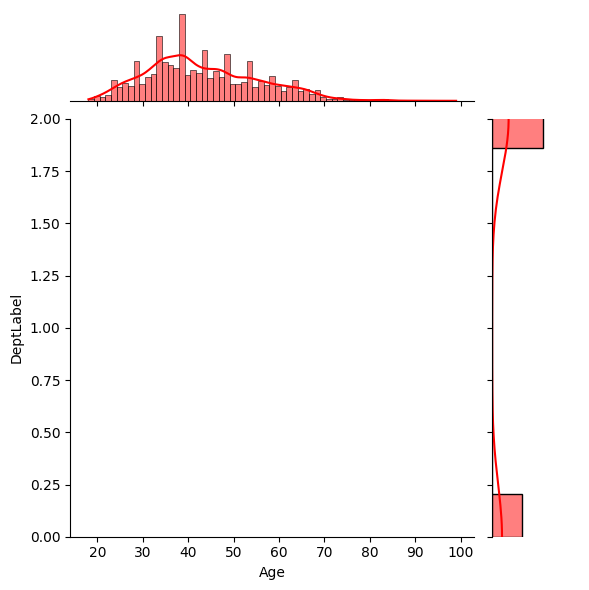

In [27]:

sns.jointplot(data=WoW, x='Age',y='DeptLabel',kind='reg',ylim=(0,2),color='red',size=4.5,ratio=4)

# Predictive Modelling through linear regression model

In [ ]:
y=WoW[['Rating']]
x=WoW[['DeptLabel']]
regmodel=linear_model.LinearRegression()
regmodel.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [ ]:
#providing DeptLabel 4 and checking if it provides the rating or not
newp=5
newp=np.array(newp)
newp=newp.reshape(-1,1)
pred=regmodel.predict(newp)
pred

array([[4.16674983]])

### We conclude that DeptLabel=4 i.e. Jackets have mostly the rating of 4

In [ ]:
WoW.describe()

,Cloth_ID,Age,Rating,Recommended,pos_feed_count,DeptLabel
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,918.118709,43.198544,4.196032,0.822362,2.535936,3.195052
std,203.298980,12.279544,1.110031,0.382216,5.702202,1.887257
min,0.000000,18.000000,1.000000,0.000000,0.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000,0.000000,2.000000
50%,936.000000,41.000000,5.000000,1.000000,1.000000,3.000000
75%,1078.000000,52.000000,5.000000,1.000000,3.000000,5.000000
max,1205.000000,99.000000,5.000000,1.000000,122.000000,6.000000


### Through test_train_split model 
### Training 20% of our entire data and testing on the rest of it

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
WoW.head()

,Cloth_ID,Age,Title,Reviews,Rating,Recommended,pos_feed_count,Div_Name,Dept_Name,DeptLabel
0,767,33,Basic,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,3
1,1080,34,Basic,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,2
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,2
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,0
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,5


In [ ]:
x=WoW[['Cloth_ID','Age','Rating','pos_feed_count','DeptLabel']]

In [ ]:
y=WoW[['Recommended']]

In [ ]:
#WoW2=pd.DataFrame(data=WoW)  #creating a new dataframe so that original dataframe not affected

# Building Logistic Regression Model

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=101)

In [ ]:
X_train.head()

,Cloth_ID,Age,Rating,pos_feed_count,DeptLabel
3211,862,41,5,5,5
8841,1025,46,5,0,0
291,984,71,5,0,4
5857,1033,45,5,0,0
8693,774,47,1,20,3


# Training and Predicting

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
LRModel=LogisticRegression()

In [ ]:
LRModel.fit(X_train,y_train)

C:\Users\Dilip\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dilip\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

# Testing out model

In [ ]:
prediction_cl=LRModel.predict(X_test)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(y_test,prediction_cl))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80       823
           1       0.96      0.95      0.96      3875

   micro avg       0.93      0.93      0.93      4698
   macro avg       0.87      0.89      0.88      4698
weighted avg       0.93      0.93      0.93      4698



### creating a new row in dataframe

In [ ]:
x=['Cloth_ID','Age','Rating','pos_feed_count','DeptLabel']
data=[5463,23,3,6,7]
recom=pd.DataFrame([data],columns=x)
recom.head()

,Cloth_ID,Age,Rating,pos_feed_count,DeptLabel
0,5463,23,3,6,7


In [ ]:
WoW.head()

,Cloth_ID,Age,Title,Reviews,Rating,Recommended,pos_feed_count,Div_Name,Dept_Name,DeptLabel
0,767,33,Basic,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,3
1,1080,34,Basic,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,2
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,2
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,0
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,5


In [ ]:
prediction_cl=LRModel.predict(recom)

In [ ]:
print(prediction_cl)

[0]


### This shows that given the details the product is not recommended

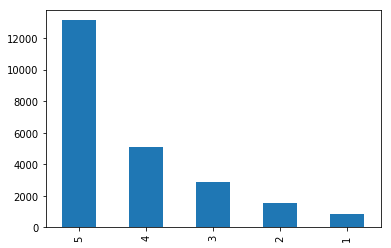

In [ ]:
WoW['Rating'].value_counts().plot(kind='bar')

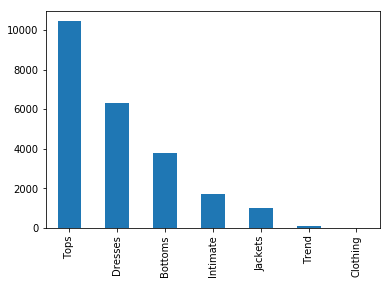

In [ ]:
deptnumber=WoW['Dept_Name'].value_counts()
deptnumber[:10].plot(kind='bar')

In [ ]:
WoW2=WoW[WoW['Rating']==5]

In [ ]:
WoW2.head()

,Cloth_ID,Age,Title,Reviews,Rating,Recommended,pos_feed_count,Div_Name,Dept_Name,DeptLabel
1,1080,34,Basic,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,2
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,0
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,5
6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,5
8,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,2


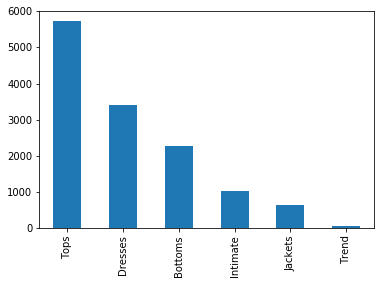

In [ ]:
WoW2['Dept_Name'].unique()
deptnumber=WoW2['Dept_Name'].value_counts()
deptnumber[:6].plot(kind='bar')